<a href="https://colab.research.google.com/github/jhordi19/Ciencia_de_datos/blob/Taller_2025/Taller_Sem09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

###Carga y normalizacion de datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

# 1. Cargar dataset
df = pd.read_csv("DF_preprocesado.csv")
X = df.drop(columns=["Hypertension", "Fruits", "Veggies"])
y = df["Hypertension"]

# 2. División en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
x_train_bal, y_train_bal = smoteenn.fit_resample(x_train, y_train)

In [ ]:
df.head()

,Age,Sex,BMI,Fruits,Veggies,Salt,PhysActivity,Smoker,MentHlth,Alcohol,Vaper,Diabetes,HighChol,Hypertension
0,10,0,34.0,1,0,0,0,4,0,0,3,0,1,1
1,13,1,26.0,1,1,0,1,3,1,1,3,0,0,0
2,10,1,28.0,1,1,1,0,4,4,0,3,0,0,0
3,11,1,36.0,0,1,0,0,3,0,0,3,0,0,0
4,8,0,33.0,1,1,1,1,4,5,1,3,0,1,1


###Entrenamiento de modelos

Lineal

In [ ]:
# 4. Crear pipeline con escalado + SVM Lineal
pipeline_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=0.5, class_weight="balanced", probability=True, random_state=42))
])

# 5. Entrenar pipeline con datos balanceados
pipeline_linear.fit(x_train_bal, y_train_bal)

# 6. Evaluar en conjunto de prueba
y_pred_linear = pipeline_linear.predict(x_test)
print("📄 Reporte de clasificación - SVM Lineal:")
print(classification_report(y_test, y_pred_linear, target_names=["Sano", "Hipertenso"]))

📄 Reporte de clasificación - SVM Lineal:
              precision    recall  f1-score   support

        Sano       0.79      0.64      0.70      2562
  Hipertenso       0.64      0.79      0.71      2106

    accuracy                           0.71      4668
   macro avg       0.71      0.71      0.71      4668
weighted avg       0.72      0.71      0.71      4668



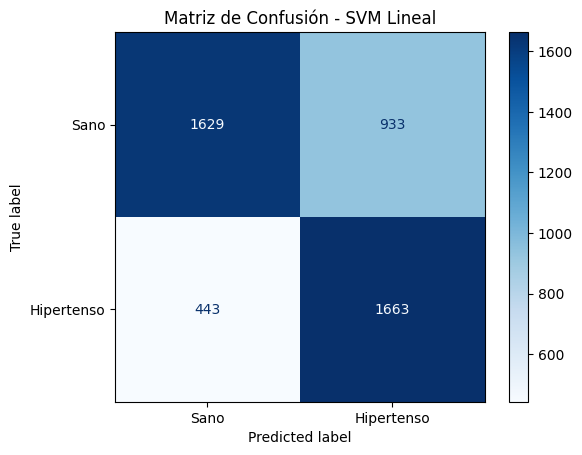

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_linear = confusion_matrix(y_test, y_pred_linear)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=["Sano", "Hipertenso"])
disp_linear.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - SVM Lineal")
plt.show()

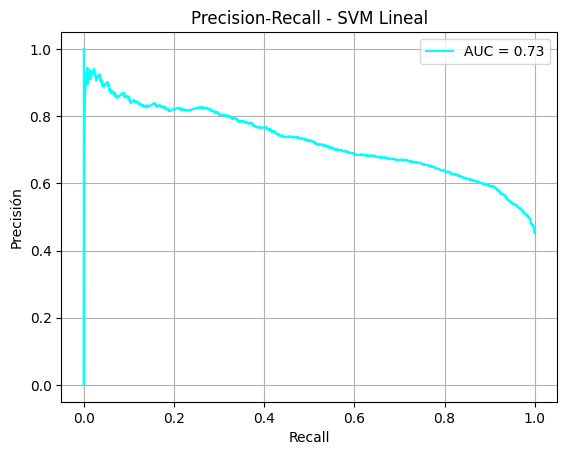

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_proba_linear = pipeline_linear.predict_proba(x_test)[:, 1]
precision_linear, recall_linear, _ = precision_recall_curve(y_test, y_proba_linear)
pr_auc_linear = auc(recall_linear, precision_linear)

plt.figure()
plt.plot(recall_linear, precision_linear, color='cyan', label=f"AUC = {pr_auc_linear:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precision-Recall - SVM Lineal")
plt.legend()
plt.grid()
plt.show()


Gaussiano

In [ ]:
# RBF
pipeline_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced', probability=True, random_state=42))
])
pipeline_rbf.fit(x_train, y_train)
y_pred_rbf = pipeline_rbf.predict(x_test)
print("📄 Reporte de clasificación - SVM Gaussiano (RBF):")
print(classification_report(y_test, y_pred_rbf, target_names=["Sano", "Hipertenso"]))

📄 Reporte de clasificación - SVM Gaussiano (RBF):
              precision    recall  f1-score   support

        Sano       0.76      0.70      0.73      2562
  Hipertenso       0.66      0.73      0.70      2106

    accuracy                           0.71      4668
   macro avg       0.71      0.71      0.71      4668
weighted avg       0.72      0.71      0.71      4668



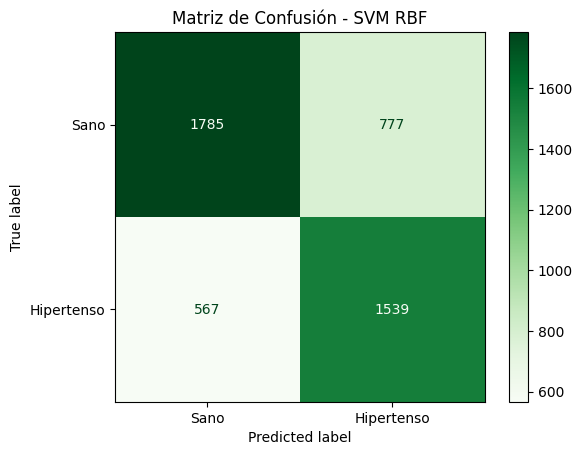

In [ ]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=["Sano", "Hipertenso"])
disp_rbf.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - SVM RBF")
plt.show()

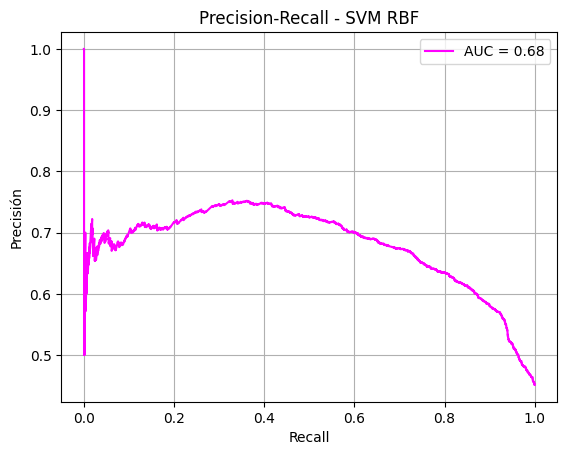

In [ ]:
y_proba_rbf = pipeline_rbf.predict_proba(x_test)[:, 1]
precision_rbf, recall_rbf, _ = precision_recall_curve(y_test, y_proba_rbf)
pr_auc_rbf = auc(recall_rbf, precision_rbf)

plt.figure()
plt.plot(recall_rbf, precision_rbf, color='magenta', label=f"AUC = {pr_auc_rbf:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precision-Recall - SVM RBF")
plt.legend()
plt.grid()
plt.show()


Polinomial

In [ ]:
# Polinomial
pipeline_poly = Pipeline([
    ("scaler", StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, C=0.5, coef0=1, class_weight='balanced', probability=True, random_state=42))
])
pipeline_poly.fit(x_train, y_train)
y_pred_poly = pipeline_poly.predict(x_test)
print("📄 Reporte de clasificación - SVM Polinomial:")
print(classification_report(y_test, y_pred_poly, target_names=["Sano", "Hipertenso"]))

📄 Reporte de clasificación - SVM Polinomial:
              precision    recall  f1-score   support

        Sano       0.76      0.69      0.72      2562
  Hipertenso       0.66      0.74      0.70      2106

    accuracy                           0.71      4668
   macro avg       0.71      0.71      0.71      4668
weighted avg       0.72      0.71      0.71      4668



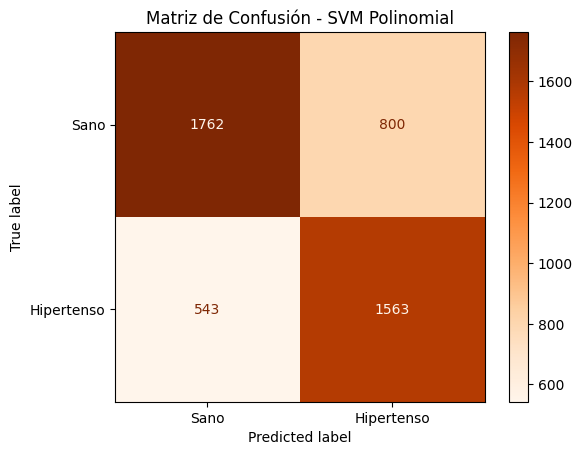

In [ ]:
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=["Sano", "Hipertenso"])
disp_poly.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - SVM Polinomial")
plt.show()

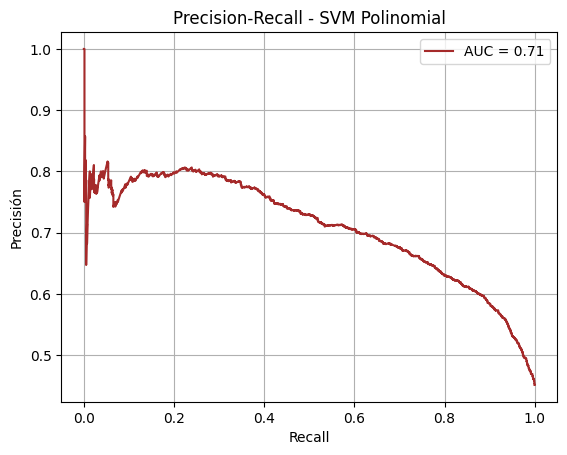

In [ ]:
y_proba_poly = pipeline_poly.predict_proba(x_test)[:, 1]
precision_poly, recall_poly, _ = precision_recall_curve(y_test, y_proba_poly)
pr_auc_poly = auc(recall_poly, precision_poly)

plt.figure()
plt.plot(recall_poly, precision_poly, color='brown', label=f"AUC = {pr_auc_poly:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precision-Recall - SVM Polinomial")
plt.legend()
plt.grid()
plt.show()


📊 Evaluación para SVM Lineal
✅ AUC-ROC: 0.7878
📉 Log Loss (Entrenamiento): 0.5477
📉 Log Loss (Prueba): 0.5514
⏱️ Tiempo de inferencia promedio: 0.310700 ms


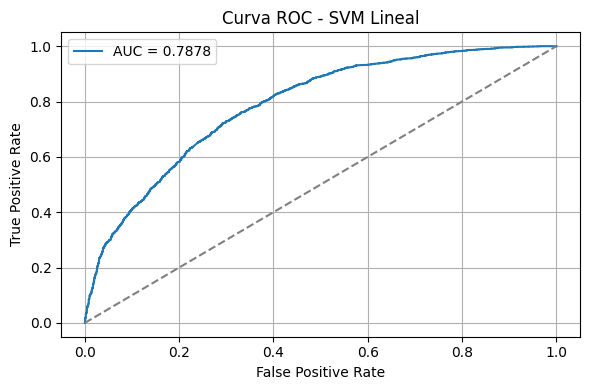


📊 Evaluación para SVM Gaussiano (RBF)
✅ AUC-ROC: 0.7691
📉 Log Loss (Entrenamiento): 0.5400
📉 Log Loss (Prueba): 0.5724
⏱️ Tiempo de inferencia promedio: 0.631456 ms


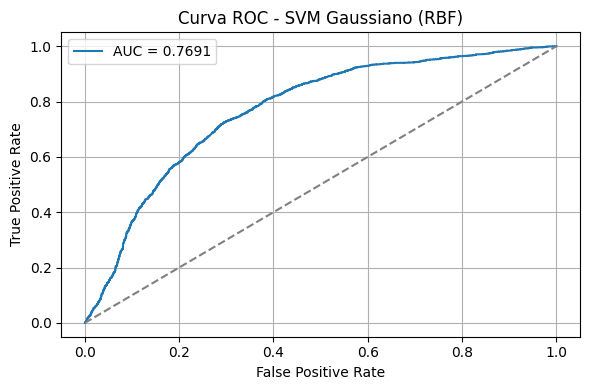


📊 Evaluación para SVM Polinomial
✅ AUC-ROC: 0.7797
📉 Log Loss (Entrenamiento): 0.5468
📉 Log Loss (Prueba): 0.5640
⏱️ Tiempo de inferencia promedio: 0.322206 ms


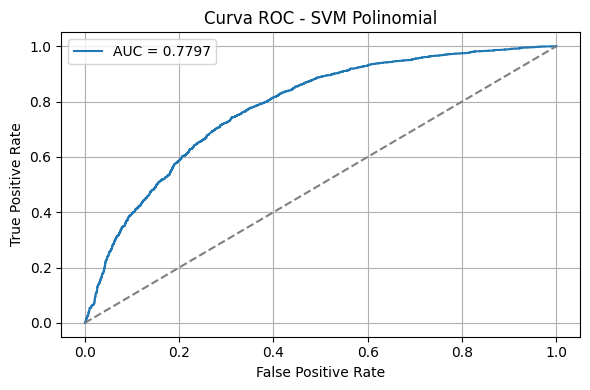

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
import matplotlib.pyplot as plt
import time

def evaluar_modelo(nombre, modelo, x_train, y_train, x_test, y_test):
    print(f"\n📊 Evaluación para {nombre}")

    # 1. AUC-ROC
    y_proba_test = modelo.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)

    # 2. Log loss (tasa de pérdida)
    y_proba_train = modelo.predict_proba(x_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_test = log_loss(y_test, y_proba_test)

    # 3. Tiempo de inferencia promedio
    start_time = time.time()
    _ = modelo.predict(x_test)
    end_time = time.time()
    tiempo_prom = (end_time - start_time) / len(x_test) * 1000  # ms

    # Resultados
    print(f"✅ AUC-ROC: {auc:.4f}")
    print(f"📉 Log Loss (Entrenamiento): {loss_train:.4f}")
    print(f"📉 Log Loss (Prueba): {loss_test:.4f}")
    print(f"⏱️ Tiempo de inferencia promedio: {tiempo_prom:.6f} ms")

    # Gráfico AUC-ROC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {nombre}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluar los pipelines SVM
evaluar_modelo("SVM Lineal", pipeline_linear, x_train, y_train, x_test, y_test)
evaluar_modelo("SVM Gaussiano (RBF)", pipeline_rbf, x_train, y_train, x_test, y_test)
evaluar_modelo("SVM Polinomial", pipeline_poly, x_train, y_train, x_test, y_test)

📋 Tabla comparativa de métricas (SVMs):


,Modelo,Accuracy,Precision,Recall,F1-score
0,SVM Lineal,0.712296,0.665366,0.728870,0.695672
1,SVM RBF,0.712082,0.664508,0.730769,0.696065
2,SVM Polinomial,0.712296,0.661447,0.742165,0.699485


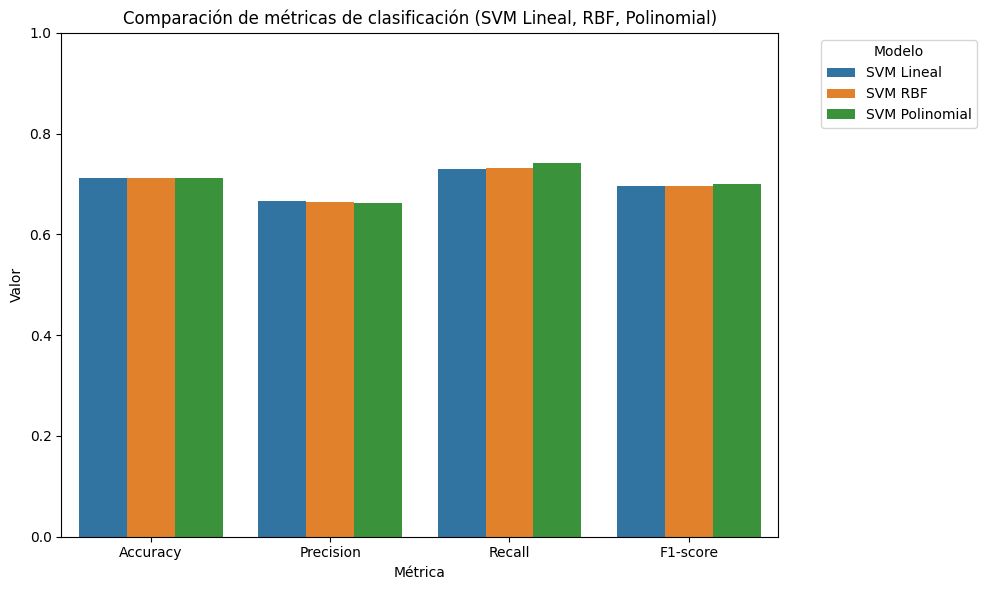

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para obtener métricas
def obtener_metricas_clasificacion(nombre, modelo, x_test, y_test):
    y_pred = modelo.predict(x_test)
    return {
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

# Obtener métricas para los modelos con Pipeline
metricas_linear = obtener_metricas_clasificacion("SVM Lineal", pipeline_linear, x_test, y_test)
metricas_rbf    = obtener_metricas_clasificacion("SVM RBF", pipeline_rbf, x_test, y_test)
metricas_poly   = obtener_metricas_clasificacion("SVM Polinomial", pipeline_poly, x_test, y_test)

# Crear DataFrame con todas las métricas
df_metricas_svm = pd.DataFrame([metricas_linear, metricas_rbf, metricas_poly])

# Mostrar tabla
print("📋 Tabla comparativa de métricas (SVMs):")
display(df_metricas_svm)

# Gráfico de barras agrupadas
df_melted = df_metricas_svm.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Métrica', y='Valor', hue='Modelo')
plt.ylim(0, 1)
plt.title("Comparación de métricas de clasificación (SVM Lineal, RBF, Polinomial)")
plt.ylabel("Valor")
plt.xlabel("Métrica")
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import joblib

joblib.dump(pipeline_rbf, "modelo_svm_rbf.pkl", compress=9)
print("✅ Modelo SVM RBF exportado como 'modelo_svm_rbf.pkl'")

✅ Modelo SVM RBF exportado como 'modelo_svm_rbf.pkl'


In [ ]:
import joblib

joblib.dump(pipeline_linear, "modelo_svm_lineal_actualizado.pkl")
print("✅ Modelo SVM Lineal exportado como 'modelo_svm_lineal.pkl'")

joblib.dump(pipeline_rbf, "modelo_svm_rbf_actualizado.pkl")
print("✅ Modelo SVM RBF exportado como 'modelo_svm_rbf.pkl'")

joblib.dump(pipeline_poly, "modelo_svm_polinomial_actualizado.pkl")
print("✅ Modelo SVM Polinomial exportado como 'modelo_svm_polinomial.pkl'")

✅ Modelo SVM Lineal exportado como 'modelo_svm_lineal.pkl'
✅ Modelo SVM RBF exportado como 'modelo_svm_rbf.pkl'
✅ Modelo SVM Polinomial exportado como 'modelo_svm_polinomial.pkl'


In [ ]:
# Cargar modelos previamente guardados
modelo_svm_rbf = joblib.load("modelo_svm_rbf_actualizado.pkl")

In [ ]:
# Cargar modelos previamente guardados
modelo_svm_lineal = joblib.load("modelo_svm_lineal_actualizado.pkl")
modelo_svm_rbf = joblib.load("modelo_svm_rbf_actualizado.pkl")
modelo_svm_polinomial = joblib.load("modelo_svm_polinomial_actualizado.pkl")

In [ ]:
import numpy as np
import pandas as pd
import joblib

# === 1. Cargar el modelo previamente exportado ===
modelo = joblib.load("modelo_svm_rbf_actualizado.pkl")  # Cambia por otro si es necesario

# === 2. Datos de entrada manuales (simulan una persona) ===
Age = 9
Sex = 0
BMI = 31.25
MentHlth = 6
Salt = 0
PhysActivity = 0
Smoker = 4
Vaper = 4
Alcohol = 1
Diabetes = 1
HighChol = 1

# === 3. Crear DataFrame con los nombres correctos de columnas ===
columnas = ['Age', 'Sex', 'BMI', 'Salt', 'PhysActivity',
            'Smoker', 'MentHlth', 'Alcohol', 'Vaper', 'Diabetes', 'HighChol']

xnew = pd.DataFrame([[
    Age, Sex, BMI, MentHlth, Salt, PhysActivity,
    Smoker, Vaper, Alcohol, Diabetes, HighChol
]], columns=columnas)

# === 4. Realizar predicción y obtener probabilidad ===
proba = modelo.predict_proba(xnew)[0][1]
y_pred = modelo.predict(xnew)[0]

# === 5. Clasificación del nivel de riesgo ===
if proba < 0.35:
    riesgo = 'Bajo'
elif proba < 0.65:
    riesgo = 'Moderado'
else:
    riesgo = 'Alto'

# === 6. Mensaje personalizado ===
if y_pred == 0:
    mensaje = '✅ Felicidades: No eres propenso a desarrollar hipertensión arterial.'
else:
    mensaje = '⚠️ A tomar precauciones: Eres propenso a desarrollar hipertensión arterial.'

# === 7. Mostrar resultados ===
print(f"🔮 Predicción: {y_pred} (0 = Sano, 1 = Hipertenso)")
print(f"📈 Probabilidad de riesgo: {proba * 100:.2f}%")
print(f"📊 Nivel de riesgo: {riesgo}")
print(mensaje)


🔮 Predicción: 1 (0 = Sano, 1 = Hipertenso)
📈 Probabilidad de riesgo: 47.15%
📊 Nivel de riesgo: Moderado
⚠️ A tomar precauciones: Eres propenso a desarrollar hipertensión arterial.
